## [psmpy package introduction](https://pypi.org/project/psmpy/)

## 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# sns.set()  # set the style

In [2]:
# !pip install psmpy
from psmpy import PsmPy
from psmpy.plotting import *

## 2. Import Data
### [Download data from Kaggle](https://www.kaggle.com/datasets/harrywang/propensity-score-matching/)


In [13]:
df=pd.read_csv('./data/groupon.csv')
df.head()

,deal_id,start_date,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500


## 3. Matching Procedure

In [4]:
# exclude: ignore any covariates (columns) passed to the it during model fitting
# indx - required parameter that references a unique ID number for each case
psm=PsmPy(df, treatment='treatment', indx='deal_id',
          exclude=['min_req', 'start_date', 'fb_likes', 'quantity_sold', 'revenue'])

In [5]:
psm.logistic_ps(balance=False) # balance: whether the logistic regression will run in a balanced fashion, default=True.
psm.predicted_data

,deal_id,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,propensity_score,propensity_logit,treatment
0,3rd-coast-cruising-1,3,75,50,378,1,1,0.541488,0.166333,0
1,516-skydive-new-york,7,145,39,170,0,1,0.063623,-2.689036,0
2,92nd-st-y-nyc,3,29,82,125,0,0,0.392219,-0.437994,0
3,above-all-cruises-ny,4,39,51,207,0,1,0.317265,-0.766371,0
4,adaptive-adventures,3,10,0,5,0,1,0.321258,-0.747996,0
...,...,...,...,...,...,...,...,...,...,...
705,gl-windy-city-circus-1,4,20,50,5,0,1,0.212691,-1.308780,1
706,lets-go-paragliding,6,99,58,73,0,1,0.083981,-2.389441,1
707,spare-time-chicago-3,4,12,74,166,0,0,0.392404,-0.437220,1
708,dc-gmt-slice-chicago-tours,7,22,51,106,0,1,0.128638,-1.913052,1


In [6]:
psm.knn_matched(matcher='propensity_logit', replacement=True, caliper=None)

C:\Users\2joon\anaconda3\lib\site-packages\psmpy\psmpy.py:346: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


## 4. Checkout Results

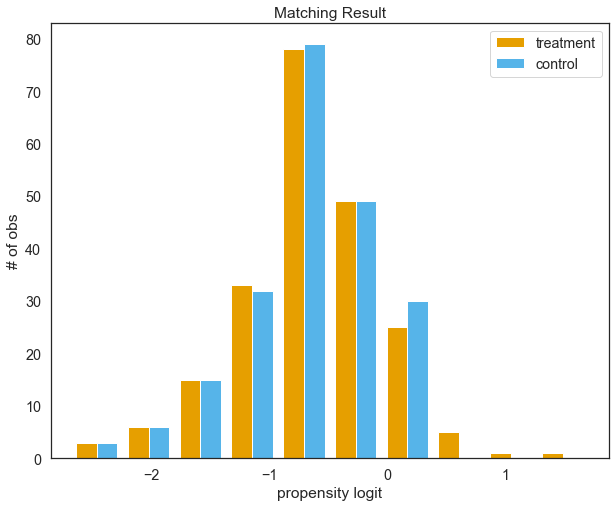

In [7]:
psm.plot_match(Title='Matching Result',
               Ylabel='# of obs',
               Xlabel='propensity logit',
               names=['treatment', 'control'])

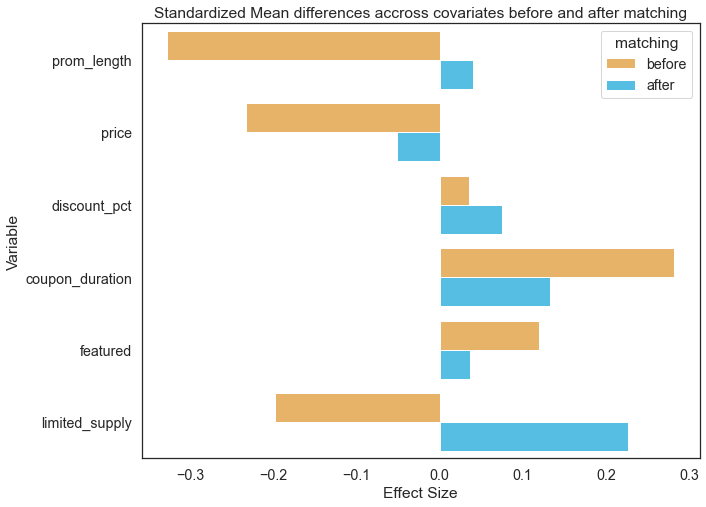

In [8]:
psm.effect_size_plot()

In [16]:
psm.effect_size.set_index(['Variable', 'matching'])

Effect Size
Variable        matching             
prom_length     before      -0.328313
                after        0.040009
price           before      -0.233573
                after       -0.051184
discount_pct    before       0.035411
                after        0.074970
coupon_duration before       0.282300
                after        0.132474
featured        before       0.119074
                after        0.036766
limited_supply  before      -0.198547
                after        0.226080

In [10]:
psm.matched_ids

,deal_id,matched_ID
0,heli-flights,gl-second-stage-theatre
1,gl-champion-series-tennis-electric-factory,luna-park-at-coney-island-3
2,realm-of-terror-horror-experience,gl-stripped-the-play
3,newport-gourmet,created-by-you
4,the-clayroom,sportations-nyc-1
...,...,...
211,gl-windy-city-circus-1,gl-chicago-wolves-1
212,lets-go-paragliding,canlan-ice-sports-6
213,spare-time-chicago-3,92nd-st-y-nyc
214,dc-gmt-slice-chicago-tours,seabreeze-charter-2


In [11]:
psm.df_matched

,deal_id,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,propensity_score,propensity_logit,treatment
0,heli-flights,4,99,51,185,1,1,0.263701,-1.026818,1
1,gl-champion-series-tennis-electric-factory,2,95,41,9,0,1,0.218561,-1.274072,1
2,realm-of-terror-horror-experience,3,25,50,38,0,1,0.284296,-0.923251,1
3,newport-gourmet,3,50,50,369,0,1,0.505683,0.022734,1
4,the-clayroom,4,25,52,185,0,1,0.325569,-0.728293,1
...,...,...,...,...,...,...,...,...,...,...
425,gl-chicago-wolves-1,4,18,53,3,0,1,0.212703,-1.308711,0
426,canlan-ice-sports-6,4,148,51,8,0,1,0.084488,-2.382875,0
427,92nd-st-y-nyc,3,29,82,125,0,0,0.392219,-0.437994,0
428,seabreeze-charter-2,3,180,50,126,0,1,0.127306,-1.924996,0
